# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: Adenike Akinbade

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Black code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [2]:
# Read data
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Copy data
market_camp = df.copy()

# View first five rows
market_camp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<IPython.core.display.Javascript object>

In [3]:
# 1a Enter your solution here

# Product features
products = [var for var in market_camp if "Mnt" in var]

# Sum of product features('Total_amount')
market_camp["Total_amount"] = np.sum(market_camp[products], axis=1)

# mean of product features('Avg_amount')
market_camp["Avg_amount"] = np.mean(market_camp[products], axis=1)

# Result
market_camp[["Avg_amount"]]

,Avg_amount
0,269.500000
1,4.500000
2,129.333333
3,8.833333
4,70.333333
...,...
2235,223.500000
2236,74.000000
2237,206.833333
2238,140.500000


<IPython.core.display.Javascript object>

In [4]:
# 1b Enter your solution here

# Use qcut to grp 'Avg_amount' features into 10 categories(deciles), order -> (0 < 1 < 2 < 3.... < 8 < 9)
market_camp["Avg_amount(weights)"] = pd.qcut(
    x=market_camp["Avg_amount"], q=10, labels=np.arange(10), duplicates="drop"
).astype(str)

# Result
market_camp[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(
    n=5, random_state=2
)

,Total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.833333,2
2019,22,3.666667,0
1891,2069,344.833333,9
335,946,157.666667,7
1600,562,93.666667,5


<IPython.core.display.Javascript object>

----

## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

In [5]:
# 2i Enter your solution here

# Percentage of customer's income spent on products
market_camp["Product_income_percent"] = (market_camp["Total_amount"] / market_camp["Income"]).mul(100)

# Result
market_camp[
    ["Total_amount", "Avg_amount", "Avg_amount(weights)", "Income", "Product_income_percent"]
].sample(n=5, random_state=2)


,Total_amount,Avg_amount,Avg_amount(weights),Income,Product_income_percent
2053,71,11.833333,2,36927.0,0.192271
2019,22,3.666667,0,30261.0,0.072701
1891,2069,344.833333,9,88420.0,2.339968
335,946,157.666667,7,62204.0,1.520803
1600,562,93.666667,5,53843.0,1.043775


<IPython.core.display.Javascript object>

In [6]:
# 2b Enter your solution here

# Print unique values
print("Previous labels: ", market_camp["Marital_Status"].unique())


def new_label(var: str) -> str:
    """A function that returns new label for Marital_Status"""
    if var == "Single":
        result = "Single"
    elif var == "Together":
        result = "Together"
    elif var == "Married":
        result = "Married"
    elif var == "Divorced":
        result = "Divorced"
    else:  # (Widow, Alone, Absurd, YOLO)
        result = "Others"
    return result


# Assigning a new label to our data applying the above function
market_camp["Marital_Status"] = market_camp["Marital_Status"].apply(
    lambda var: new_label(var)
)

print("New labels: ", market_camp["Marital_Status"].unique())

Previous labels:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
New labels:  ['Single' 'Together' 'Married' 'Divorced' 'Others']


<IPython.core.display.Javascript object>

In [7]:
# Frequency of total amount by marital status
ms_freq = market_camp.groupby(market_camp["Marital_Status"]).sum(numeric_only=True)[
    ["Total_amount"]
]
ms_freq

,Total_amount
Marital_Status,
Divorced,141666
Married,510453
Others,60892
Single,291112
Together,352865


<IPython.core.display.Javascript object>

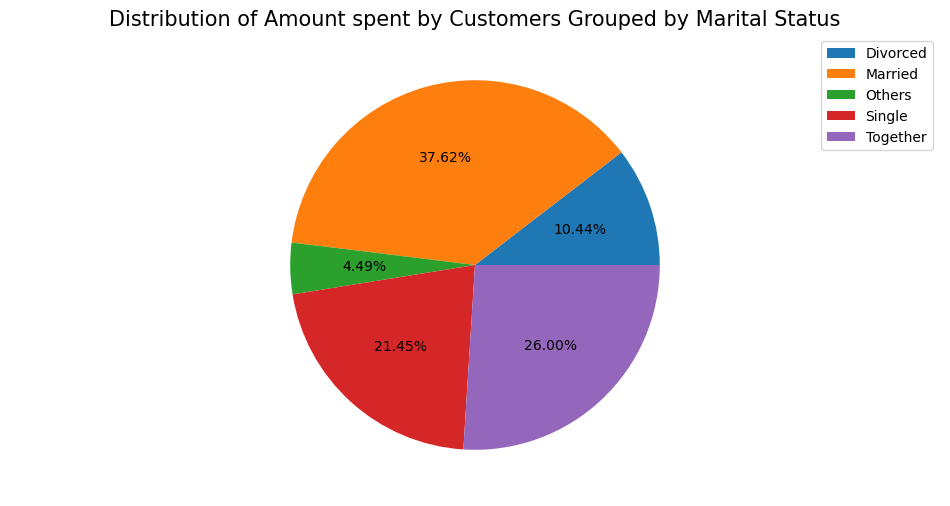

<IPython.core.display.Javascript object>

In [8]:
# Pie chart of total amount grouped by their marital status

fig = plt.figure(figsize=(12, 6))
plt.axis("equal")

plt.pie(ms_freq["Total_amount"], autopct="%0.2f%%")
plt.legend(labels=ms_freq.index)
plt.title(
    "Distribution of Amount spent by Customers Grouped by Marital Status", fontsize=15
)

plt.tight_layout
plt.show()

----


## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

In [9]:
# # 3a Enter your solution here

# Use qcut to grp 'Recency' features into 5 bins(quintiles)
market_camp["Recency(bins)"] = pd.qcut(
    x=market_camp["Recency"], q=5, duplicates="drop"
).astype(str)

# The bins
R_bin = market_camp["Recency(bins)"].value_counts(ascending=True).index
labels = ["1", "0", "2", "3", "4"]

# Genrerating dict of the bins and labels
R_dict = dict(itertools.zip_longest(R_bin, labels))

# Use map to iterate over 'Recency(bins)' (array) and modify its values with R_dict
# Return a new array ('Recency(weights)') with tranformed labels
market_camp["Recency(weights)"] = market_camp["Recency(bins)"].map(R_dict)

market_camp[
    ["Total_amount", "Avg_amount", "Avg_amount(weights)", "Recency", "Recency(weights)"]
].sample(n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights),Recency,Recency(weights)
2053,71,11.833333,2,46,2
2019,22,3.666667,0,75,1
1891,2069,344.833333,9,87,0
335,946,157.666667,7,38,3
1600,562,93.666667,5,64,1


<IPython.core.display.Javascript object>

In [10]:
# 3b Enter your solution here

# Campaign variables
campaign = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

# Sum of accepted campaign
market_camp["Total_Accepted_Campaign"] = np.sum(market_camp[campaign], axis=1)

# Count of customers that accepted at least an offer after the campaign
count_campaign_accepts = market_camp.query("Total_Accepted_Campaign >= 1")[
    "Total_Accepted_Campaign"
].count()

# Total count of customers
total_count = market_camp["Total_Accepted_Campaign"].count()

# Percentage
accepts_freq = count_campaign_accepts / total_count
accepts_percent = accepts_freq * 100
print(f"Percentage is {accepts_percent}%")

Percentage is 27.187499999999996%


<IPython.core.display.Javascript object>

----

## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [11]:
# 4a Enter your solution here

# Purchases variable
Purchases = [var for var in market_camp if "Purchases" in var]

# Sum of purchases
market_camp["PurchaseFreq"] = np.sum(market_camp[Purchases], axis=1)
market_camp[["PurchaseFreq"]]

,PurchaseFreq
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


<IPython.core.display.Javascript object>

In [12]:
# 4b Enter your solution here

# Use qcut to grp Purchases frequency into 4 categories(quartiles), order -> (0 < 1 < 2  < 3)
market_camp["Frequency(weights)"] = pd.qcut(
    x=market_camp["PurchaseFreq"], q=4, labels=np.arange(4), duplicates="drop"
).astype(str)

# Result
market_camp[
    [
        "Total_amount",
        "Avg_amount",
        "Avg_amount(weights)",
        "PurchaseFreq",
        "Frequency(weights)",
    ]
].sample(n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights),PurchaseFreq,Frequency(weights)
2053,71,11.833333,2,8,0
2019,22,3.666667,0,4,0
1891,2069,344.833333,9,20,2
335,946,157.666667,7,22,3
1600,562,93.666667,5,20,2


<IPython.core.display.Javascript object>

----

## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)
```

In [13]:
# 5a Enter your solution here

# Customer personality analysis
# Sum of 'Recency(weights)', 'Frequency(weights)' & 'Avg_amount(weights)',
market_camp["RFM"] = (
    market_camp["Recency(weights)"].astype(int)
    + market_camp["Frequency(weights)"].astype(int)
    + market_camp["Avg_amount(weights)"].astype(int)
)
market_camp[["RFM"]]

,RFM
0,14
1,3
2,11
3,4
4,7
...,...
2235,12
2236,10
2237,10
2238,13


<IPython.core.display.Javascript object>

In [14]:
# 5b Enter your solution here

# Use qcut to grp Customer personality frequency into 3 (terciles)
market_camp["Customer_value"] = pd.qcut(
    x=market_camp["RFM"],
    q=3,
    labels=["low_value", "medium_value", "high_value"],
    duplicates="drop",
)

# Result
market_camp[
    [
        "Recency(weights)",
        "Frequency(weights)",
        "Avg_amount(weights)",
        "RFM",
        "Customer_value",
    ]
].sample(n=10, random_state=2)

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
2053,2,0,2,4,low_value
2019,1,0,0,1,low_value
1891,0,2,9,11,high_value
335,3,3,7,13,high_value
1600,1,2,5,8,medium_value
1459,1,2,5,8,medium_value
2161,1,1,4,6,low_value
1026,2,0,3,5,low_value
68,4,2,6,12,high_value
2088,4,0,2,6,low_value


<IPython.core.display.Javascript object>

----